In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
N=100

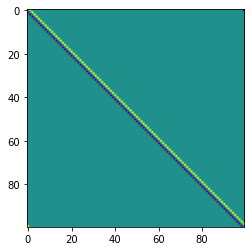

In [102]:
nabla0=np.zeros((N,N))
nabla0[np.arange(N-1) ,np.arange(N-1)+1]=1/2
nabla0[np.arange(N-1)+1,np.arange(N-1)]=-1/2
nabla0[-1,0]=1/2
nabla0[0,-1]=-1/2

nabla=np.zeros((1,N,N,1))
nabla[0,:,:,0]=nabla0

plt.imshow(nabla[0,:,:,0])
plt.show()

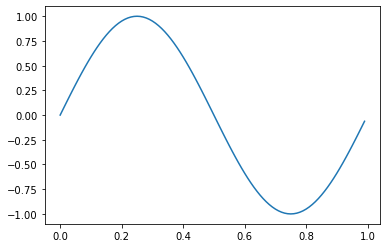

In [103]:
x=np.linspace(0,1,N, endpoint=False)
C0=np.sin(2*np.pi*x)
C=np.zeros((1,N,1,1))
C[0,:,0,0]=C0
plt.plot(x,C[0,:,0,0])

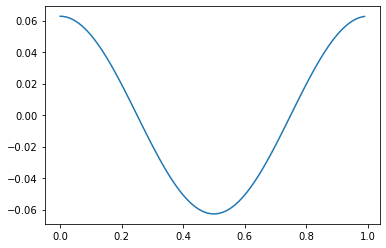

In [104]:
z0 = np.matmul(nabla0,C0)
np.shape(z0)
plt.plot(x,z0)
plt.show()

(1, 100, 100, 1)
(1, 100, 1, 1)
(1, 1, 100, 1) (1, 1, 100, 100)


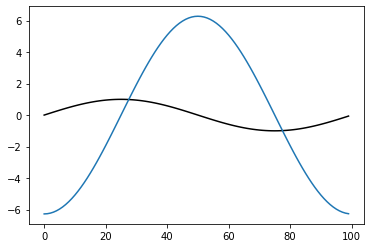

In [137]:
print(np.shape(nabla))
print(np.shape(C))

Cswp=np.swapaxes(C,-3,-2)
nswp=np.swapaxes(nabla,-3,-1)

print(np.shape(Cswp),np.shape(nswp))
def Rmatmul(nabla,C):
    '''Matrix product but with the axis of Regions rather than multisectoral'''
    return matmul(np.swapaxes(nabla, -3, -1),
                                  np.swapaxes(C, -3, -2))

plt.plot(C[0,:,0,0],c='k')
plt.plot(100*nabC[0,:,0,0])


#nablaC= np.einsum('ijkl,ijkl->ikl',nabla,C)
#nablacc=nablaC[...,np.newaxis]
#np.shape(nablacc)
#plt.plot(nablacc[0,:,0,0])
#zint=np.moveaxis(np.matmul(nabla,np.moveaxis(C,-3,-2)),-2,-3)
#plt.plot(x,zint[0,:,0,0])

In [96]:
def Rmatmul(V,M):
    return np.moveaxis(np.matmul(M,np.moveaxis(V,-3,-2)),-2,-3)

In [97]:

nabC = Rmatmul(C,nabla)
lapC = Rmatmul(nabC,nabla)


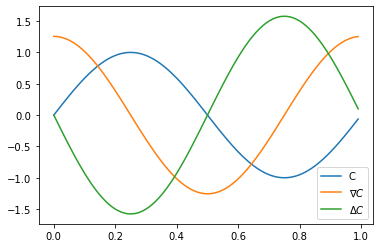

In [100]:

plt.figure('')
plt.plot(x,C[0,:,0,0],label='C')
plt.plot(x,nabC[0,:,0,0]*20,label=r'$\nabla C$')
plt.plot(x,lapC[0,:,0,0]*400,label=r'$\Delta C$')
plt.legend()
plt.show()


In [138]:
import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy scipy matplotlib pyvis 

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm


#####################################################################################
 _______            ______  ________  ____    ____  ____    ____  ________   ______    
|_   __ \         .' ___  ||_   __  ||_   \  /   _||_   \  /   _||_   __  |.' ____  \   
  | |__) |_   __ / .'   \_|  | |_ \_|  |   \/   |    |   \/   |    | |_ \_|| (___ \_|  
  |  ___/[ \ [  ]| |   ____  |  _| _   | |\  /| |    | |\  /| |    |  _| _  _.____`.   
 _| |_    \ '/ / \ `.___]  |_| |__/ | _| |_\/_| |_  _| |_\/_| |_  _| |__/ || \____) |  
|_____| [\_:  /   `._____.'|________||_____||_____||_____||_____||________| \______.'  
         \__.'                           
#####################################################################################                                                                                                                                   

Welcome in Pygemmes, a modular library to prototype and study dynamical systems !
This library is oriented toward generation

In [143]:
hub=pgm.Hub('Diffusion',preset='Basic')
hub.run()
R=hub.get_dparam()
C=R['C']['value'][:,0,:,0,0]


####################
Loading model Diffusion from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- differential: ['C']
	- statevar: ['gradCx', 'lapC']
	- parameter: ['diffCoeff', 'nabla']
The following fields are identified as parameters :
	- independant : []
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['gradCx', 'lapC']
	- differential: ['C', 'time']
time step 1000 / 1000


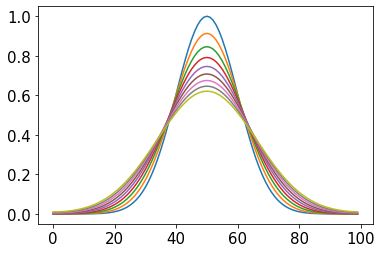

In [145]:
for i in range(9):
    plt.plot(C[100*i,:])
plt.show()